In [2]:
from lxml import html
from bs4 import BeautifulSoup
import requests
import urllib.request
import bs4
import csv
import pandas as pd
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import math
from nltk.stem import PorterStemmer
import math
from collections import Counter
import string
from nltk.corpus import stopwords

In [3]:
# create list of the links in movies
tree = html.parse(r"movies2.html")
movies2 = html.tostring(tree)
soup = BeautifulSoup(movies2)
links = []
for link in soup.findAll('a'):
    links.append(link.get('href'))
links

['https://en.wikipedia.org/wiki/10_to_Midnight',
 'https://en.wikipedia.org/wiki/All_the_Right_Moves_(film)',
 'https://en.wikipedia.org/wiki/Americana_(film)',
 'https://en.wikipedia.org/wiki/Amityville_3-D',
 'https://en.wikipedia.org/wiki/Anna_to_the_Infinite_Power',
 'https://en.wikipedia.org/wiki/Baby_It%27s_You_(film)',
 'https://en.wikipedia.org/wiki/Bad_Boys_(1983_film)',
 'https://en.wikipedia.org/wiki/Better_Late_Than_Never_(film)',
 'https://en.wikipedia.org/wiki/The_Big_Chill_(film)',
 'https://en.wikipedia.org/wiki/The_Black_Stallion_Returns',
 'https://en.wikipedia.org/wiki/Blue_Thunder',
 'https://en.wikipedia.org/wiki/Born_in_Flames',
 'https://en.wikipedia.org/wiki/Brainstorm_(1983_film)',
 'https://en.wikipedia.org/wiki/Breathless_(1983_film)',
 'https://en.wikipedia.org/wiki/Can_She_Bake_a_Cherry_Pie%3F',
 'https://en.wikipedia.org/wiki/Chicken_Ranch_(film)',
 'https://en.wikipedia.org/wiki/Christine_(1983_film)',
 'https://en.wikipedia.org/wiki/A_Christmas_Story',
 

In [4]:
for i in range(10):
    try:
        html = urllib.request.urlopen(links[i]).read() 
        with open('../data_input/article_{}.html'.format(i), 'wb+') as f:
                    f.write(html)
    except Exception as e:
        print(i, links[i], e)
        continue

In [5]:
# save all .tsv
# made some test
for article in range(10):  # range of files
    try:
        html = BeautifulSoup(open("../data_input/article_{}.html".format(article), encoding ='utf-8'), 'html.parser')
    except Exception as e:   # if article doesn't exists
        print(article, e)
        continue

    title = html.select("h1")[0].text
        
    # initialize tmp as intro
    tmp = 'intro'
    sections = {'intro' : '', 'plot' : ''}
    
    # take all paragraphs section by section and save only intro and plot
    for section in html.select('div.mw-parser-output > *'):    # take only notes in the first level
        if(section.name == 'p' and tmp == 'intro'):
            sections['intro'] += section.text.strip()
    
        # chage tmp on section names
        if(section.name in ['h2','h3']):
            tmp = section.span['id']
    
        # take only sections we are interrested in
        if(section.name == 'p' and tmp in ['Plot','Plot_summary','Premiese']):  # check different names for plot sections
            sections['plot'] += section.text.strip()
    
    # we doesn't take in consideration pages without Plot
    if(sections['plot'] == ''):
        print(article, 'No Plot')
        continue

    # dictionary for infobox
    d = {'film_name':title, 'Directed by': 'NA', 'Produced by': 'NA', 'Written by': 'NA', 'Starring':'NA', 'Music by': 'NA',
         'Release date': 'NA', 'Running time': 'NA', 'Country': 'NA', 'Language': 'NA', 'Budget': 'NA'}

    # take elem from infobox
    info_box = html.findAll(['th', 'td'])
    for elem in info_box:
        info = elem.text.strip('\n')   # take text from the table
        if info in d:
            d[info] = info_box[info_box.index(elem)+1].text.strip('\n')
    
    # select elem in oroder as a list to save in .tsv
    ld = list(d.values())
    columns = ['title', 'intro', 'plot', 'film_name', 'Directed by', 'Produced by', 'Written by', 'Starring', 'Music by',
         'Release date', 'Running time', 'Country', 'Language', 'Budget']
    data = [title, sections['intro'], sections['plot']] + ld[0:]
    # create and save a tsv
    with open('../data_output/article_{}.tsv'.format(article), 'w', newline='',encoding='utf-8') as f_output:
        tsv_output = csv.writer(f_output, delimiter='\t')
        tsv_output.writerow(columns)
        tsv_output.writerow(data)

7 No Plot


In [6]:
b = pd.read_csv('../data_output/article_0.tsv', sep = '\t')
for i in range(6):
    try:
        b = b.append(pd.read_csv('../data_output/article_{}.tsv'.format(i), sep = '\t'), ignore_index = True)
    except Exception as e:
        print(i, e)
b
#b.reset_index(inplace = True)

,title,intro,plot,film_name,Directed by,Produced by,Written by,Starring,Music by,Release date,Running time,Country,Language,Budget
0,10 to Midnight,10 to Midnight is a 1983 American crime-horror...,Warren Stacy (Gene Davis) is a young office eq...,10 to Midnight,J. Lee Thompson,Pancho KohnerLance Hool,William RobertsJ. Lee Thompson,Charles Bronson\nLisa Eilbacher\nAndrew Steven...,Robert O. Ragland,"March 11, 1983 (1983-03-11) (U.S.)",101 min,United States,English,"$4,520,000 (US)"
1,10 to Midnight,10 to Midnight is a 1983 American crime-horror...,Warren Stacy (Gene Davis) is a young office eq...,10 to Midnight,J. Lee Thompson,Pancho KohnerLance Hool,William RobertsJ. Lee Thompson,Charles Bronson\nLisa Eilbacher\nAndrew Steven...,Robert O. Ragland,"March 11, 1983 (1983-03-11) (U.S.)",101 min,United States,English,"$4,520,000 (US)"
2,All the Right Moves (film),All the Right Moves is a 1983 American sports ...,"Stefen ""Stef"" Djordjevic (Cruise) is a Serbian...",All the Right Moves (film),Michael Chapman,Stephen Deutsch,Michael Kane,Tom Cruise\nCraig T. Nelson\nLea Thompson,David Richard Campbell,"October 21, 1983 (1983-10-21)",91 minutes,United States,English,$5.6 million[1]
3,Americana (film),Americana is a 1983 American drama film starri...,"A down on his luck, former Green Beret captain...",Americana (film),David Carradine,David CarradineSkip Sherwood,Henry Morton Robinson,David CarradineBarbara HersheyMichael Greene,Craig Huntley,"October 21, 1983 (1983-10-21)",91 min.,United States,English,NaN
4,Amityville 3-D,Amityville 3-D (also known as Amityville III: ...,After he exposes a pair of con artists with hi...,Amityville 3-D,Richard Fleischer,Stephen F. Kesten,David Ambrose,Tony Roberts\nTess Harper\nRobert Joy\nCandy C...,Howard Blake,"November 18, 1983 (1983-11-18)",105 min (US)93 min. (UK),United StatesMexico,English,$6 million
5,Anna to the Infinite Power,Anna to the Infinite Power is a 1982 science-f...,"Twelve-year-old Anna Hart of Flemington, New J...",Anna to the Infinite Power,Robert Wiemer,Bruce Graham,Robert WiemerBased on Anna to the Infinite Pow...,Martha ByrneDina MerrillMark PattonDonna Mitch...,Paul Baillargeon,1982[1],105 min.[1],United States,English,NaN
6,Baby It's You (film),Baby It's You is a 1983 American romantic come...,"The film, set in 1966 New Jersey, is about a r...",Baby It's You (film),John Sayles,Griffin DunneAmy Robinson,NaN,Rosanna Arquette\nVincent Spano,Todd Kasow,"March 4, 1983 (1983-03-04) (United States)",105 minutes,United States,English,"$3,000,000[1]"


In [7]:
starring=(b['Starring'][0].split('\n'))

C:\Users\Daniele\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


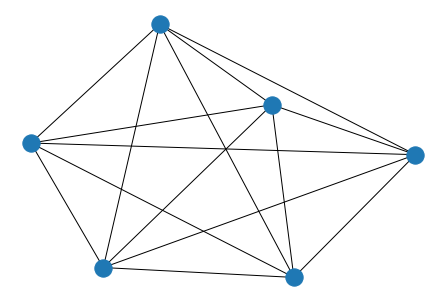

In [52]:
from itertools import combinations
combination=[]
for i in range(6):
    starring=(b['Starring'][i].split('\n'))
    combination+=list(combinations(starring, 2))
relations_actor=[x for x in combination if combination.count(x)>1]
actors=[]
for i in relations_actor:
    for j in i:
        actors+=[j]
actors=set(actors)
actors=list(actors)
act_dic={}
for i in actors:
    act_dic[i]=actors.index(i)
relations_actor_2=[]
for elem in relations_actor:
    elem=list(elem)
    relations_actor_2+=[elem]
for i in relations_actor_2:
    i[0]=act_dic[i[0]]
    i[1]=act_dic[i[1]]

import networkx as nx
import matplotlib.pyplot as plt
g=nx.Graph()
for i in act_dic.values():
    g.add_node(i)
for i in relations_actor_2:
    g.add_edge(*i)

nx.draw(g)
    
    

            
        
    

In [49]:
relations_actor_2

[[3, 4],
 [3, 2],
 [3, 5],
 [3, 1],
 [3, 0],
 [4, 2],
 [4, 5],
 [4, 1],
 [4, 0],
 [2, 5],
 [2, 1],
 [2, 0],
 [5, 1],
 [5, 0],
 [1, 0],
 [3, 4],
 [3, 2],
 [3, 5],
 [3, 1],
 [3, 0],
 [4, 2],
 [4, 5],
 [4, 1],
 [4, 0],
 [2, 5],
 [2, 1],
 [2, 0],
 [5, 1],
 [5, 0],
 [1, 0]]

In [70]:

lis_links=[]
actor_key=actor_info.keys()
for i in range(len(actor_info.keys())):
    for j in range (i+1,len(actor_info.keys())):
        p=set(actor_key[i]) & set(actor_key[j])
        print(p)
        if len(p)>1:
            link=[actor_key[i],actor_key[j]]
            lis_links+=[link]

actor_info

defaultdict(list,
            {'10 to Midnight': ['Charles Bronson',
              'Lisa Eilbacher',
              'Andrew Stevens',
              'Gene Davis',
              'Geoffrey Lewis',
              'Wilford Brimley'],
             'All the Right Moves (film)': ['Tom Cruise',
              'Craig T. Nelson',
              'Lea Thompson'],
             'Americana (film)': ['David CarradineBarbara HersheyMichael Greene'],
             'Amityville 3-D': ['Tony Roberts',
              'Tess Harper',
              'Robert Joy',
              'Candy Clark'],
             'Anna to the Infinite Power': ['Martha ByrneDina MerrillMark PattonDonna MitchellJack Gilford']})

In [46]:
lis_links=[]
for i in range(len(actor_info.keys())):
    for j in range (i+1,len(actor_info.keys())):
        if actor_info[i] and actor_info[j] >len(1):
            link+=[actor_info[i],actor_info[j]]
            lis_links+=[link]

In [45]:
film_info

{'10 to Midnight': ['Charles Bronson',
  'Lisa Eilbacher',
  'Andrew Stevens',
  'Gene Davis',
  'Geoffrey Lewis',
  'Wilford Brimley'],
 'All the Right Moves (film)': ['Tom Cruise',
  'Craig T. Nelson',
  'Lea Thompson'],
 'Americana (film)': ['David CarradineBarbara HersheyMichael Greene'],
 'Amityville 3-D': ['Tony Roberts',
  'Tess Harper',
  'Robert Joy',
  'Candy Clark'],
 'Anna to the Infinite Power': ['Martha ByrneDina MerrillMark PattonDonna MitchellJack Gilford']}

In [8]:
b

,title,intro,plot,film_name,Directed by,Produced by,Written by,Starring,Music by,Release date,Running time,Country,Language,Budget
0,10 to Midnight,10 to Midnight is a 1983 American crime-horror...,Warren Stacy (Gene Davis) is a young office eq...,10 to Midnight,J. Lee Thompson,Pancho KohnerLance Hool,William RobertsJ. Lee Thompson,Charles Bronson\nLisa Eilbacher\nAndrew Steven...,Robert O. Ragland,"March 11, 1983 (1983-03-11) (U.S.)",101 min,United States,English,"$4,520,000 (US)"
1,10 to Midnight,10 to Midnight is a 1983 American crime-horror...,Warren Stacy (Gene Davis) is a young office eq...,10 to Midnight,J. Lee Thompson,Pancho KohnerLance Hool,William RobertsJ. Lee Thompson,Charles Bronson\nLisa Eilbacher\nAndrew Steven...,Robert O. Ragland,"March 11, 1983 (1983-03-11) (U.S.)",101 min,United States,English,"$4,520,000 (US)"
2,All the Right Moves (film),All the Right Moves is a 1983 American sports ...,"Stefen ""Stef"" Djordjevic (Cruise) is a Serbian...",All the Right Moves (film),Michael Chapman,Stephen Deutsch,Michael Kane,Tom Cruise\nCraig T. Nelson\nLea Thompson,David Richard Campbell,"October 21, 1983 (1983-10-21)",91 minutes,United States,English,$5.6 million[1]
3,Americana (film),Americana is a 1983 American drama film starri...,"A down on his luck, former Green Beret captain...",Americana (film),David Carradine,David CarradineSkip Sherwood,Henry Morton Robinson,David CarradineBarbara HersheyMichael Greene,Craig Huntley,"October 21, 1983 (1983-10-21)",91 min.,United States,English,NaN
4,Amityville 3-D,Amityville 3-D (also known as Amityville III: ...,After he exposes a pair of con artists with hi...,Amityville 3-D,Richard Fleischer,Stephen F. Kesten,David Ambrose,Tony Roberts\nTess Harper\nRobert Joy\nCandy C...,Howard Blake,"November 18, 1983 (1983-11-18)",105 min (US)93 min. (UK),United StatesMexico,English,$6 million
5,Anna to the Infinite Power,Anna to the Infinite Power is a 1982 science-f...,"Twelve-year-old Anna Hart of Flemington, New J...",Anna to the Infinite Power,Robert Wiemer,Bruce Graham,Robert WiemerBased on Anna to the Infinite Pow...,Martha ByrneDina MerrillMark PattonDonna Mitch...,Paul Baillargeon,1982[1],105 min.[1],United States,English,NaN
6,Baby It's You (film),Baby It's You is a 1983 American romantic come...,"The film, set in 1966 New Jersey, is about a r...",Baby It's You (film),John Sayles,Griffin DunneAmy Robinson,NaN,Rosanna Arquette\nVincent Spano,Todd Kasow,"March 4, 1983 (1983-03-04) (United States)",105 minutes,United States,English,"$3,000,000[1]"


In [9]:
def addLink(row):
    return links[row['index']]

In [10]:
b['Wikipedia link'] = b.apply(addLink, axis = 1)
b

KeyError: ('index', 'occurred at index 0')

In [ ]:
def cleanData(intro, plot):
    
    
    
    return cleaned_text

In [ ]:
def createVocabulary(row, voc, le):
    text = cleanData(row['intro'], row['plot'])

In [ ]:
voc = {}
le = {}
b.apply(createVocabulary, axis = 1, args = (voc, le))

In [ ]:
stop_words=set(stopwords.words('english'))
Filtered_Documents=[]
words=word_tokenize(document.read())
Filtered_Documents= [w for w in words if not w in stop_words]

ps=PorterStemmer()
Stemmed_Documents=[]
for w in Filtered_Documents:
    Stemmed_Documents.append(ps.stem(w))
    
punctuations = list(string.punctuation)
punctuations.append("''")
Final_Doc=[]

without_punctation=[w for w in Stemmed_Documents if not w in punctuations]

In [22]:
Vocabulary=defaultdict(list)
Lenghts={}
for j in range(6):
    name='document_{}'.format(j)
    try:
        document=open(str('../data_output/article_{}.tsv'.format(j)),'r+',encoding='utf-8')
    except Exception as e:
        continue
    words=word_tokenize(document.read())
    lenght=len(words)
    Lenghts[name]=lenght
    
for j in range(6):
    name='document_{}'.format(j)
    try:
        document=open(str('../data_output/article_{}.tsv'.format(j)),'r+',encoding='utf-8')
    except Exception as e:
        continue
    words=word_tokenize(document.read())
    words
    for w in words:
        if ',' in w:
            n_w=w.split(',')
            for w in n_w:
                if w not in Vocabulary:
                    Vocabulary[w] = {name : 1}
                else:
                    if name not in Vocabulary[w]:
                        Vocabulary[w][name] = 1
                    else:
                        Vocabulary[w][name] += 1
        else:
            if w not in Vocabulary:
                Vocabulary[w] = {name : 1}
            else:
                if name not in Vocabulary[w]:
                    Vocabulary[w][name] = 1
                else:
                    Vocabulary[w][name] += 1

N_Vocabulary=defaultdict(list)
for k in Vocabulary.keys():
    repetition=len(Vocabulary[k])
    IDF=math.log(6/repetition)
    for elem in Vocabulary[k].keys():
        valore=Vocabulary[k][elem]
        Tf=(valore)/(Lenghts[elem])
        Finale=(elem,Tf*IDF)
        N_Vocabulary[k].append(Finale)



In [23]:
Vocabulary

defaultdict(list,
            {'title': {'document_0': 1,
              'document_1': 1,
              'document_2': 1,
              'document_3': 1,
              'document_4': 1,
              'document_5': 1},
             'intro': {'document_0': 1,
              'document_1': 1,
              'document_2': 1,
              'document_3': 1,
              'document_4': 1,
              'document_5': 1},
             'plot': {'document_0': 1,
              'document_1': 1,
              'document_2': 1,
              'document_3': 1,
              'document_4': 1,
              'document_5': 1},
             'film_name': {'document_0': 1,
              'document_1': 1,
              'document_2': 1,
              'document_3': 1,
              'document_4': 1,
              'document_5': 1},
             'Directed': {'document_0': 1,
              'document_1': 1,
              'document_2': 1,
              'document_3': 1,
              'document_4': 1,
              'document_5': 

In [24]:
N_Vocabulary

defaultdict(list,
            {'title': [('document_0', 0.0),
              ('document_1', 0.0),
              ('document_2', 0.0),
              ('document_3', 0.0),
              ('document_4', 0.0),
              ('document_5', 0.0)],
             'intro': [('document_0', 0.0),
              ('document_1', 0.0),
              ('document_2', 0.0),
              ('document_3', 0.0),
              ('document_4', 0.0),
              ('document_5', 0.0)],
             'plot': [('document_0', 0.0),
              ('document_1', 0.0),
              ('document_2', 0.0),
              ('document_3', 0.0),
              ('document_4', 0.0),
              ('document_5', 0.0)],
             'film_name': [('document_0', 0.0),
              ('document_1', 0.0),
              ('document_2', 0.0),
              ('document_3', 0.0),
              ('document_4', 0.0),
              ('document_5', 0.0)],
             'Directed': [('document_0', 0.0),
              ('document_1', 0.0),
              ('d